### Sumário

- Estimando medidas ruidosas com teorema de bayes
- Pdf a posterior e teorema de bayes
- Pdf a priori, verossimilhanca e pdf a posteriori
- Simulando medidas ruidosas do parâmetro X
- Definindo a pdf a priori e a calculando a função de verossimilhança
- Calculando a pdf a posteriori
- Estimando X dinâmicamente
- Observando a evolução pdf posteriori ao longo das medidas
- Conclusão

### Estimando medidas com ruídos com teorema de bayes

Hoje iremos ver como podemos estimar o valor de um parâmetro e sua incerteza sobre ele usando estatística baysiana.

Vamos analisar o exemplo no qual queremos estimar o valor de uma grandeza X contaminada por um ruído gaussiano.

$Y = aX_{real} + \eta$, onde $\eta$ ~ $N(0, \sigma^2)$ 

Podemos supor que $X_{real}$ tem um valor determinístico e constante, mas para podermos incluir no processo nossa incerteza sobre o valor de $X$ vamos modelá-lo como uma v.a. aleatória, esse tipo de modelo faz sentido já que a princípio não temos idéia sobre o valor exato de $X_{real}$. Assim, podemos modelar X como uma v.a. gaussiana com média $\mu_0$ e variância $\sigma_0^2$.

A média $\mu_0$ representa nosso chute inicial em relação ao valor $\mu_0$ e a variância representa a nossa incerteza em relação a $\mu_0$. Desse modo, caso não tenhamos um bom chute de valor inicial podemos simplesmente colocar um valor qualquer para $\mu_0$ e uma varância muito grande.

Para continuarmos, vamos supor que  observamos uma sequência de observações $\overline{y} = \{y_0, y_1, ..., y_n\}$  e queremos atualizar a pdf de $X$ com a informação trazidas pelas amostras de $y$.

### Pdf a posterior e teorema de bayes

Como agora nossa parâmetro desconhecido X é representado por uma v.a. aleatória $X$, podemos calcular a probabiliade após observarmos as medidas, ou seja, queremos obter:

$p(x/y_{1..n})$

Porém inicialmente so temos a nossa dispoção o conhecimento das amostras $\overline{y}$ e a pdf a priori de $X$, para nossa sorte essas duas informações podem ser relacionadas pelo teorema de bayes da seguinda forma:

$p(x/y_{1..n}) = \frac{p(y_{1..n}/x)p(x)}{p(y_{1..n})}$

Com isso, podemos chegar a pdf a posteriori e assim atualizar nossa crença sobre a v.a. $X$ através do teorema de bayes. A seguir vamos desenvolver essas equações e ver como calcular os novos parâmetros da v.a. X com pdf gaussiana.

### Pdf a priori, verossimilhanca e pdf a posteriori

Com o discutido acima, vamos inicialmente "chutar" uma pdf a $X$, sendo está pdf à priori dada por:

p(x) = $N(\mu_0, \sigma_0^2)$

Em seguida calculemos a função de verossimilhança referente a $n$ observações:

$p(y_{1..n}/x) = \prod_{i=0}^{i=n}p(y_{1..n}/x) = \prod_{i=0}^{i=n}{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{y_i-ax}{\sigma})^2}}$

A pdf a posteriori, aquela após incluirmos a informação das medidas observadas é dada por:

$p(x/y_{1..n}) = \frac{p(x)p(y_{1..n}/x)}{p(y_{1..n})}$

Como $p(y_{1..n})$ é uma constante de normalização e não depende $x$, vamos ignorar esse termo escrevendo:

$p(x/y_{1..n}) \propto p(y_{1..n}/x)p(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu_0}{\sigma_0})^2}\prod_{i=0}^{i=n}{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{y_i-ax}{\sigma})^2}} = N(\mu_0, \sigma_0^2)\prod_{i=0}^{i=n}N(ax, \sigma^2)$

Ou seja, a pdf a posteriori será o produto de gaussianas. Usando a propriedade de que produto de duas gaussianas também é uma gaussiana (https://ccrma.stanford.edu/~jos/sasp/Product_Two_Gaussian_PDFs.html) temos:

$p(x/y_{1..n}) = N((\frac{\mu_0}{\sigma_0^2}+\frac{a\sum{y_i}}{\sigma^2})\sigma_n^2, \sigma_n^2)$ onde $\sigma_n^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{na^2}{\sigma^2}}$

Vemos que a pdf a posteriori depende dos parâmetros da pdf a priori, dos valores observados e da variância do ruído e mais interessante vemos que com o aumento de $n$ a variância $\sigma_n^2$ tenderá a 0. Ou seja, se obtivermos medidas suficiente poderemos ter uma boa estimativa de X. 

### Simulando medidas ruidosas do parâmetro X

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vamos simular o exemplo discutido definindo os parâmetros reais da pdf de X.

In [2]:
mu_real = 3;

Em seguida, os valores da pdf a priori.

In [3]:
mu0 = 1;
sigma0 = np.sqrt(2);

Vamos coletar algumas amostras e ver graficamente a pdf a priori, a verossimilhança e a posteriori.

In [4]:
sigma = np.sqrt(4) # Variância do ruido
a = 2
n = 10 # Número de amostras observadas

In [5]:
y = a*mu_real+ np.random.normal(0, sigma, n)

### Definindo a pdf a priori e a calculando a função de verossimilhança

In [6]:
# Função gaussiana (pdf a prior e a posteriori)
def gaussian(x, mu, std):
    return np.exp(-0.5*((x-mu)/std)**2)/(std*np.sqrt(2*np.pi))

In [7]:
def verossimilhanca(y, mu, std):
    return np.exp(-0.5*((y-mu)/std)**2)/(std*np.sqrt(2*np.pi))

Cálculo da função de verossimilhança como sendo o produto de várias gaussianas.

In [8]:
mu = np.linspace(-5, 10, 1000)

In [9]:
gauss_y = np.array([verossimilhanca(obs, a*mu, sigma) for obs in y])
verossim = np.prod(gauss_y, 0)

### Calculando a pdf a posteriori

Parâmetros da pdf a posteriori.

In [10]:
sigma_pos = np.sqrt(1/(1/sigma0**2 + n*a**2/sigma**2))
mu_pos = (mu0/sigma0**2 + a*np.sum(y[0:n])/sigma**2)*sigma_pos**2

Vamos conferir graficamante a pdf a priori e a posterior.

In [11]:
prod = gaussian(mu, mu0, sigma0)*verossim

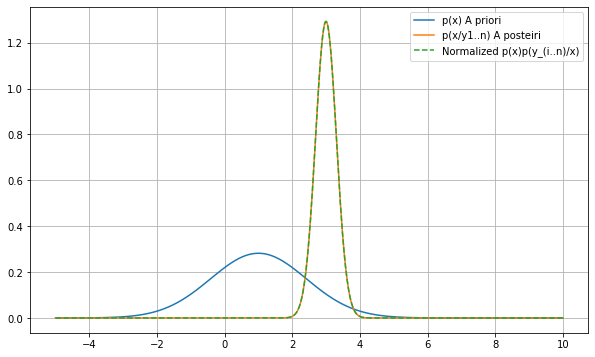

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(mu, gaussian(mu, mu0, sigma0))
plt.plot(mu, gaussian(mu, mu_pos, sigma_pos))
plt.plot(mu, np.abs(prod/np.trapz(mu, prod)), '--')
plt.legend(["p(x) A priori", "p(x/y1..n) A posteiri", "Normalized p(x)p(y_(i..n)/x)"])
plt.grid()

Pelo gráfico vemos que inicialmente nossa crença sobre X era que este tinha um valor médio de $\mu_0$ e uma variância de $\sigma_0^2$ e que após incluir a informação da verossimilhança nossa nova estimativa passou a ser: 

In [13]:
mu_pos, sigma_pos**2

(2.9960895933977327, 0.09523809523809525)

Ou seja, a média passou a ser bem próxima do valor real e a desvio padrão menor que o valor inicialmente adotado. Permitindo obter uma boa estimativa sobre o valor da grandeza X.

### Estimando X dinâmicamente

Apesar do problema discutido parecer extremamente abstrato, diversas aplicações podem ser escritas através da equação:

$Y = aX + \eta$, onde $\eta$ ~ $N(0, \sigma^2)$ 

Um exemplo, seria observar as medidas de um sensor que mede uma quantidade X, a própria quantia a ser medida comporta-se de fato como uma v.a. aleatória pois esta oscila em torno de um valor médio. Além disso, a própria observação com o sensor adiciona ruído a medida representando na nossa equação por $\eta$ e $a$ é uma constante de proporcionalidade do sensor. 

Somente neste pequeno exemplo já incluímos uma grande variedade aplicações como medir tensões, temperatura, posição, velocidade, etc.

Calcular a probabilidade a posteriori tem como resultado o agrupamento de medidas ruidosas para estimar o valor de uma grandeza. Agora imaginemos um processo em tempo real, no qual não temos $n$ medidas em um só instance, será que precisamos esperar $n$ medidas para estimar o valor? Ou podemos a cada medida nova incrementar nossa estimativa usando o último valor estimado? 

Graças ao teorema de bayes podemos sim realizar nossa estimativa passo a passo aumentando sua precisão a cada novo valor observado, fazemos isso atualização a pdf a posteriori com os valores dos novos dados.

Vamos assumir que temos a estimativa a posteriori feita usando a medida do índice $i$, isto é, temos:

$p(x/y_{1..i})$

E queremos calcular a posteriori após receber a medida $i+1$ $p(x/y_{1..i+1})$.

Vamos aplicar o teorema de bayes ver como essas duas probabilidades se relacionam:

$p(x/y_{1..i+1}) = \frac{p(y_{1..i+1}/x)p(x)}{p(y_{1..i+1})}$

Assim como fizemos antes, vamos ignorar o termo constante $p(y_{1..i+1})$, obtendo:

$p(x/y_{1..i+1}) \propto p(y_{1..i+1}/x)p(x) = p(y_{1..i}, y_{i+1}/x)p(x) = p(y_{i+1}/x)p(y_{1..i}/x)p(x) \propto p(y_{i+1}/x)p(x/y_{1..i})$

Ou seja, basta multiplicarmos a pdf a posterior anterior (aquela feita com $i$ medidas) pela função verossimilhança da medida $i+1$. Desenvolvendo as equações podemos relacionar os parâmetros da média e desvio padrão da pdf a posteriori:

$p(x/y_{1..i+1}) = N((\frac{\mu_0}{\sigma_0^2}+\frac{a\sum{y_i}}{\sigma_{1..i}^2})\sigma^2, \sigma^2)$ onde $\sigma^2 = \frac{1}{\frac{1}{\sigma_0^2} + \frac{a^2}{\sigma^2}}$

Ou seja, a cada nova amostra a média a posteriori é atualizada para uma média ponderada pelas variâncias da posteriori antiga e da função de verossimilhança, já a nova variância é dada pela media hârmonica das duas variâncias. 

### Observando a evolução pdf posteriori ao longo das medidas

Vamos ver um exemplo numério acompanhando inicialmente a atualização da pdf a priori com a primeira medida $y_0$ e em seguida por uma segunda $y_1$. Para isso vamos verificar que tanto a pdf a priori, a pdf a priori e a posteriori possuem área sobre a curva igual 1.

In [14]:
np.trapz(mu, gaussian(mu, mu0, sigma0)), np.trapz(mu, gaussian(mu, mu0, sigma0))

(-0.9998148818478434, -0.9998148818478434)

In [16]:
# Posteriori depois da primeira medida
sigma_pos_1 = np.sqrt(1/(1/sigma0**2 + a**2/sigma**2))
mu_pos_1 = (mu0/sigma0**2 + a*y[0]/sigma**2)*sigma_pos_1**2

# Posteriori depois da segunda medida
sigma_pos_2 = np.sqrt(1/(1/sigma_pos_1**2 + a**2/sigma**2))
mu_pos_2 = (mu_pos_1/sigma_pos_1**2 + a*y[1]/sigma**2)*sigma_pos_2**2

Em seguida calculemos a função de verossimilhança:

$p(y_{1..n}/x) = \prod_{i=0}^{i=n}p(y_{1..n}/x) = \prod_{i=0}^{i=n}{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{y_i-ax}{\sigma})^2}}$



In [17]:
pdf_prod_1 = gauss_y[0]*gaussian(mu, mu0, sigma0)
pdf_prod_2 = gauss_y[1]*gaussian(mu, mu_pos_1, sigma_pos_1)

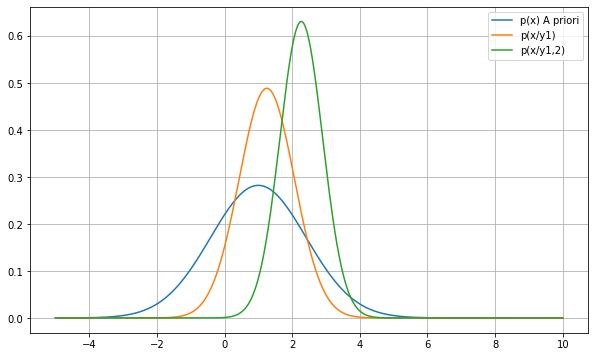

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(mu, gaussian(mu, mu0, sigma0))
plt.plot(mu, gaussian(mu, mu_pos_1, sigma_pos_1))
plt.plot(mu, gaussian(mu, mu_pos_2, sigma_pos_2))
plt.legend(["p(x) A priori", "p(x/y1)", "p(x/y1,2)"])
plt.grid()

Podemos ver no gráfico que após cada medida a pdf a posteriori é alterada movendo sua média para próximo do valor real de X e diminuindo sua variância.

In [36]:
def prior_update(y, mu0, sigma0, sigma_noise):
    sigma_pos = np.sqrt(1/(1/sigma0**2 + a**2/sigma_noise**2))
    mu_pos = (mu0/sigma0**2 + a*y/sigma_noise**2)*sigma_pos**2
    return mu_pos, sigma_pos


In [53]:
n = 500
y = a*mu_real+ np.random.normal(0, sigma, n)

In [54]:
mu_list = [mu0]
sigma_list = [sigma0]

for idx, measurment in enumerate(y): 
    mu_pos, sigma_pos = prior_update(measurment, mu_list[idx], sigma_list[idx], sigma)
    mu_list.append(mu_pos)
    sigma_list.append(sigma_pos)

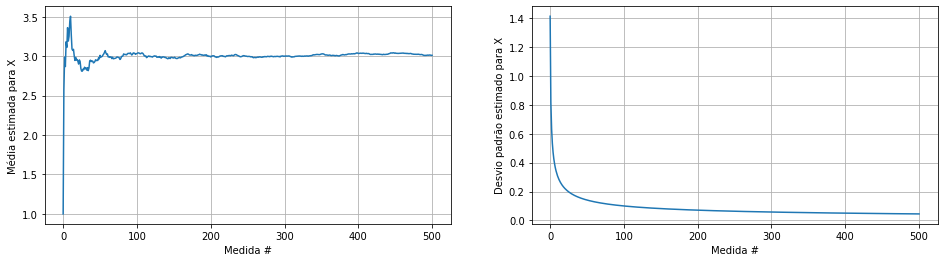

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(mu_list)
axs[0].set_ylabel("Média estimada para X")
axs[0].set_xlabel("Medida #")
axs[0].grid()
axs[1].plot(sigma_list)
axs[1].set_ylabel("Desvio padrão estimado para X")
axs[1].set_xlabel("Medida #")
axs[1].grid()

Conforme processamos as medidas o valor médio tende a convergir para o valor real de X enquanto a desvio padrão da estimativa fica cada vez menor. Também é possível notar que iniciamente nossa incerteza caí rápidemente ao considerarmos as primeiras medidas na estimativa e que depois nossa precisão aumenta mais lentamente.

Esse decaimento exponencial da incerteza pode também ser interpretado do ponto de vista de teoria da informação, pois as primeiras medidas trazem informações novas, mas como estas são muito correlacionadas com as seguintes a cada nova medida uma quantidade menor de informação é obtida e o desvio padrão cai mais lentamente. 

### Conclusão

Neste tópico discutimos:
- Como estimar um valor contaminado com ruído (aproximandamente gaussian).
- Como a pdf a posterior, a função de verossimilhança e a pdf a priori de uma v.a. pode ser relacionada pelo teorema de bayes.
- Como calcular a pdf a posterior considerando medidas em batch.
- Como calcular a pdf a posterior considerando uma medida de cada vez de forma dinâmica.
- Observamos graficamente a evolução da pdf.